In [40]:
%load_ext autoreload
%autoreload 2


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# import keras_tuner as kt

from sklearn.preprocessing import StandardScaler


import os
import datetime
import seaborn as sns

import pandas as pd
import numpy as np

from functions import *



from sklearn import preprocessing

from sklearn.linear_model import Ridge



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def nn_pscore_model1(input_size = 36):
    '''
    Returns a compiled keras model
    '''
    model = Sequential()
    model.add(Dense(30, input_dim = input_size, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.name="NAME"
    return model

In [89]:
def generate_covariates(data_num, pscore_model, outcome_model, normalize = False):
    y, X, cf_X = reformat_data_2(data_num)
    z, X_pscore = reformat_data_pscore(data_num, drop_first_dummies = False, normalize = normalize) #drop first false for NN model
    
    
    
    # outcome regression
    outcome_model.fit(X, y)
    cf_y = outcome_model.predict(cf_X)
    
    # propensity score estimation
    pscore_model.fit(X_pscore, z, epochs = 150, batch_size = 32, verbose = 0)
    p_scores = pscore_model.predict(X_pscore)
    visualize_pscore(p_scores, z)
    
    outcomes, results, _ = reformat_data_2(data_num, drop_first_dummies = False)
    results['p_score'] = p_scores 
    results['cf_Y'] = cf_y
    return outcomes, results
    

(0      1037.217510
 1      1218.815467
 2      1334.714499
 3      1337.227184
 4      1266.273917
           ...     
 995    1155.731942
 996    1143.146744
 997    1238.548082
 998     973.693394
 999    1076.348868
 Name: Y, Length: 1000, dtype: float64,
      year  Z  n.patients     V1_avg    V2_avg    V3_avg    V4_avg  V5_A_avg  \
 0       3  0         422  11.289510  2.933649  0.533175  0.073811  0.734597   
 1       4  0         399  11.288839  2.979950  0.548872  0.077572  0.729323   
 2       3  0         553  11.519129  3.027125  0.511754 -0.048760  0.824593   
 3       4  0         562  11.634449  2.975089  0.519573 -0.019508  0.823843   
 4       3  0         809  11.634021  2.970334  0.574784  0.153454  0.546354   
 ..    ... ..         ...        ...       ...       ...       ...       ...   
 995     4  0        1085  11.696356  2.974194  0.489401 -0.216472  0.719816   
 996     3  1         511  11.521370  3.088063  0.545988 -0.105939  0.837573   
 997     4  1       

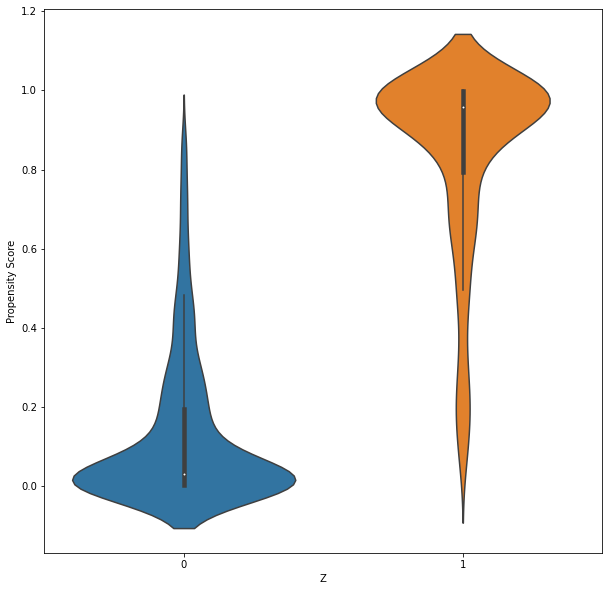

In [92]:
generate_covariates(124, nn_pscore_model1(), Ridge(alpha = 10))